In [721]:
with open('libraries.py') as f:
    code = f.read()
exec(code)

with open('functions.py') as f:
    code = f.read()
exec(code)

In [722]:
pd.reset_option('all')
pd.set_option('display.max_rows', 100)

In [723]:
# determine user
user = getpass.getuser()
if user == 'peymanshahidi':
    main_folder_path = '/Users/peymanshahidi/Dropbox (MIT)/Research/AI and Occupations/ai-exposure'
    data_path = f'{main_folder_path}/output'

In [724]:
onet_data_path = f'{data_path}/data/onet_occupations_yearly.csv'

# list of occupations to create DAGs for
occupation_list = ['travelAgents', 'insuranceUnderwriters', 'pileDriverOperators', 
                   'dredgeOperators', 'gradersAndSortersForAgriculturalProducts', 'reinforcingIronAndRebarWorkers',
                   'insuranceAppraisersForAutoDamage', 'floorSandersAndFinishers', 'dataEntryKeyer', 
                   'athletesAndSportsCompetitors', 'audiovisualEquipmentInstallerAndRepairers', 'hearingAidSpecialists', 
                   'personalCareAides', 'proofreadersAndCopyMarkers', 'chiropractors', 
                   'shippingReceivingAndInventoryClerks', 'cooksShortOrder', 'orthodontists',
                   'subwayAndStreetcarOperators', 'packersAndPackagersHand', 'hoistAndWinchOperators', 
                   'forgingMachineSettersOperatorsAndTenders', 'avionicsTechnicians', 'dishwashers', 
                   'dispatchersExceptPoliceFireAndAmbulance', 'familyMedicinePhysicians', 'MachineFeedersAndOffbearers'
                   ]

occupation = 'travelAgents'
# occupation = 'insuranceAppraisersForAutoDamage'
# occupation = 'insuranceUnderwriters'
#occupation = 'pileDriverOperators'
#occupation = 'floorSandersAndFinishers'
occupation = 'dataEntryKeyer' 

# Generate occupation-specific strings
GPT_input_occupation, plot_title_occupation, occupation_code, occupation_folder = pick_occupation(occupation)

In [725]:
# set alpha as AI quality metric
epsilon = 1e-8
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1-epsilon]

### Initialize input-output paths

In [726]:
# Manual DAG
input_path = f'{occupation_folder}/{occupation}_M_DAG_df.csv'
output_path = f'{occupation_folder}/{occupation}_costMin_M.csv'

# First Last Task DAG
input_path = f'{occupation_folder}/{occupation}_FLT_GPT_DAG_df.csv'
output_path = f'{occupation_folder}/{occupation}_costMin_FLT.csv'

# # Conditioned First Last Task DAG
# input_path = f'{occupation_folder}/{occupation}_CFLT_GPT_DAG_df.csv'
# output_path = f'{occupation_folder}/{occupation}_costMin_CFLT.csv'

# # Partitioned DAG
# input_path = f'{occupation_folder}/{occupation}_P_GPT_DAG_df.csv'
# output_path = f'{occupation_folder}/{occupation}_costMin_P.csv'

# # Conditioned Partitioned DAG
# input_path = f'{occupation_folder}/{occupation}_CP_GPT_DAG_df.csv'
# output_path = f'{occupation_folder}/{occupation}_costMin_CP.csv'

In [727]:
# read DAG
dag_df = pd.read_csv(input_path)

# remove edges if comment column labeled with "TriangleRemovedFlag" (edge is there for plotting purposes and is not part of the actual DAG)
if 'comment' in dag_df.columns:
    dag_df = dag_df[~dag_df['comment'].str.endswith('TriangleRemovedFlag')]

# get task stats
tasks_stats = pd.read_csv(f'{occupation_folder}/{occupation}_taskStats.csv')

tasks_stats = tasks_stats[['task', 'human_cost', 'management_cost', 'management_difficulty']]
tasks_stats.rename(columns={'management_difficulty': 'difficulty'}, inplace=True)

# tasks_stats = tasks_stats[['task', 'human_cost', 'machine_cost', 'completion_difficulty']]
# tasks_stats.rename(columns={'machine_cost': 'management_cost', 'completion_difficulty': 'difficulty'}, inplace=True)

#tasks_stats = pd.read_csv(f'{occupation_folder}/{occupation}_taskStats_oldold.csv')

# print stats
#tasks_stats.iloc[:,1:].sum()
dag_df

,source,target,comment
0,"Compile, sort, and verify the accuracy of data...",Store completed documents in appropriate locat...,The worker storing completed documents needs t...
1,"Compare data with source documents, or re-ente...",Maintain logs of activities and completed work.,The worker maintaining logs of activities and ...
2,"Compare data with source documents, or re-ente...",Store completed documents in appropriate locat...,The worker storing completed documents needs t...
3,"Compile, sort, and verify the accuracy of data...","Resolve garbled or indecipherable messages, us...",The worker resolving garbled or indecipherable...
4,"Compile, sort, and verify the accuracy of data...","Compare data with source documents, or re-ente...",The worker verifying data for errors needs to ...
5,"Locate and correct data entry errors, or repor...",Maintain logs of activities and completed work.,The worker maintaining logs of activities and ...
6,Select materials needed to complete work assig...,Load machines with required input or output me...,The worker loading machines with required inpu...
7,"Read source documents such as canceled checks,...","Locate and correct data entry errors, or repor...",The worker responsible for locating and correc...
8,"Read source documents such as canceled checks,...",Maintain logs of activities and completed work.,The worker maintaining logs of activities and ...
9,Select materials needed to complete work assig...,Maintain logs of activities and completed work.,The worker maintaining logs of activities and ...


In [728]:
# extract list of tasks and create a dictionary for indexing tasks
tasks_list = tasks_stats['task'].unique()
tasks_dict = {i: node for i, node in enumerate(tasks_list, start=0)}

# create numpy array of adjacency matrix
adjacency_matrix = np.zeros((len(tasks_list), len(tasks_list)), dtype=int)
aux_dict = {value: key for key, value in tasks_dict.items()}
for _, row in dag_df.iterrows():
    source_index = aux_dict[row['source']]
    target_index = aux_dict[row['target']]
    adjacency_matrix[source_index, target_index] = 1

tasks_dict

{0: 'Read source documents such as canceled checks, sales reports, or bills, and enter data in specific data fields or onto tapes or disks for subsequent entry, using keyboards or scanners.',
 1: 'Compile, sort, and verify the accuracy of data before it is entered.',
 2: 'Compare data with source documents, or re-enter data in verification format to detect errors.',
 3: 'Store completed documents in appropriate locations.',
 4: 'Locate and correct data entry errors, or report them to supervisors.',
 5: 'Maintain logs of activities and completed work.',
 6: 'Select materials needed to complete work assignments.',
 7: 'Load machines with required input or output media, such as paper, cards, disks, tape, or Braille media.',
 8: 'Resolve garbled or indecipherable messages, using cryptographic procedures and equipment.',
 9: '"Target"'}

In [729]:
# add task_dict key and reset index
aux_dict = {value: key for key, value in tasks_dict.items()}
tasks_stats['dict_index'] = tasks_stats.apply(lambda row: aux_dict[row.task], axis=1)
tasks_stats = tasks_stats.sort_values(by='dict_index')
tasks_stats = tasks_stats.set_index('dict_index', drop=False)
tasks_stats.index.name = None

In [730]:
# create dictionaries for human cost, management cost, and difficulty
M_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['human_cost']))
A_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['management_cost']))
D_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['difficulty']))

### Generate all possible partition schemes for the set of tasks (ignoring structre of the DAG)

In [731]:
from itertools import combinations

def partitions(set_):
    if not set_:
        yield []
        return
    for i in range(1, len(set_) + 1):
        for part in combinations(set_, i):
            remaining = set(set_) - set(part)
            if not remaining:
                yield [list(part)]
            else:
                for b in partitions(list(remaining)):
                    yield [list(part)] + b

def generate_unique_partitions(numbers):
    all_partitions = set()
    for partition in partitions(numbers):
        # Create a frozenset of frozensets to make each partition hashable and order-independent
        partition_set = frozenset(frozenset(part) for part in partition)
        all_partitions.add(partition_set)
    
    # Convert the frozensets back to lists for the final output
    unique_partitions = [list(map(list, partition)) for partition in all_partitions]

    # Sort elements
    unique_partitions = sorted([sorted(x) for x in unique_partitions], key=len)
    return unique_partitions

In [732]:
# Generate list of numbers for non-"Target" tasks in occupation
tasks_list_numbers = list(range(len(tasks_list)-1)) # -1 for "Target" task: don't want to include it in task partitions as it's its own separate partition

# Generate all possible partitioning schemes
all_partitions = generate_unique_partitions(tasks_list_numbers)


### Check if partition scheme is "valid" (i.e., if its non-singleton partitions are a connected graph)

In [733]:
def is_connected(matrix):
    # Number of nodes in the matrix
    num_nodes = matrix.shape[0]
    
    # Visited array to keep track of visited nodes
    visited = np.zeros(num_nodes, dtype=bool)
    
    # Helper function to perform DFS
    def dfs(node):
        visited[node] = True
        # Visit all the neighbors of the current node
        for neighbor in range(num_nodes):
            if matrix[node, neighbor] == 1 and not visited[neighbor]:
                dfs(neighbor)
            elif matrix[neighbor, node] == 1 and not visited[neighbor]:
                dfs(neighbor)
    
    # Start DFS from the first node (node 0)
    dfs(0)
    
    # If all nodes are visited, the matrix is connected
    return np.all(visited)


def validate_partition_using_connectedness(adjacency_matrix, tasks_list):
    # Return valid if Singleton
    if len(tasks_list) == 1:
        return True
    # Check if partition forms connected graph
    else:
        # Subset original adjacency matrix
        subset_matrix = adjacency_matrix[np.ix_(tasks_list, tasks_list)]

        # check if subset matrix is a connected graph
        subset_matrix_connected = is_connected(subset_matrix)

        # return true if connected and false otherwise
        return subset_matrix_connected

In [734]:
# Get valid partitioning schemes from all possible partitions to cut computation load
valid_partitions = []
for scheme in all_partitions:
    # Set valid partitions count to 0
    valid_partition_count = 0
    for partition in scheme:
        valid_partition = validate_partition_using_connectedness(adjacency_matrix, partition)
        if valid_partition:
            valid_partition_count += 1
    
    # If number of valid partitions within a partition scheme is equal to 
    # number of partitions in partition scheme then partition scheme is valid
    if valid_partition_count == len(scheme):
        valid_partitions.append(scheme)

# Print stats
print(f'Number of all possible partitioning schemes: {len(all_partitions)}')
print(f'Number of valid partitioning schemes given DAG structure: {len(valid_partitions)}')

# print some partitions
print('\nExample partitions:')
for partition in valid_partitions[10:20]:
    print(partition)

Number of all possible partitioning schemes: 21147
Number of valid partitioning schemes given DAG structure: 2048

Example partitions:
[[0, 1, 5, 8], [2, 3, 4, 6, 7]]
[[0, 3, 4, 6, 7], [8, 1, 2, 5]]
[[0, 1, 2, 3, 4, 8], [5, 6, 7]]
[[0, 3, 5, 6, 7], [8, 1, 2, 4]]
[[0, 4, 5, 6, 7], [8, 1, 2, 3]]
[[0, 2, 3], [1, 4, 5, 6, 7, 8]]
[[0, 1, 2, 8], [3, 4, 5, 6, 7]]
[[0, 2, 4, 5, 6, 7], [8, 1, 3]]
[[0, 2, 4, 5], [1, 3, 6, 7, 8]]
[[0, 2], [1, 3, 4, 5, 6, 7, 8]]


In [735]:
# get how many "singleton" partitions there are in valid partition
valid_execution_plans = pd.DataFrame()
for my_valid_partition in valid_partitions:
    singleton_partitions = [lst[0] for lst in my_valid_partition if len(lst) == 1]
    #singleton_partitions = [lst for lst in my_valid_partition if len(lst) == 1]

    # get the power set of "singleton" partitions
    # goal is to generate ways singleton tasks can be done by human or AI
    all_combinations = [[]]
    for r in range(1, len(singleton_partitions) + 1):
        combinations_r = itertools.combinations(singleton_partitions, r)
        all_combinations.extend(combinations_r)

    # Convert the combinations to a list of lists (optional)
    all_combinations = [list(comb) for comb in all_combinations]
    all_combinations

    # repeat my_valid_partition for each combination in all_combinations to create a dataframe later
    my_valid_partition_repeated = [my_valid_partition for _ in range(len(all_combinations))]
    aux_df = pd.DataFrame({'execution_plan': my_valid_partition_repeated, 
                        'human_tasks': all_combinations})
    
    # append to valid_execution_plans
    valid_execution_plans = pd.concat([valid_execution_plans, aux_df], ignore_index=True)

valid_execution_plans

,execution_plan,human_tasks
0,"[[0, 1, 2, 3, 4, 5, 6, 7, 8]]",[]
1,"[[0, 3], [1, 2, 4, 5, 6, 7, 8]]",[]
2,"[[0, 1, 4, 5, 6, 7, 8], [2, 3]]",[]
3,"[[0, 1, 2, 3, 8], [4, 5, 6, 7]]",[]
4,"[[0, 2, 3, 4, 5, 6, 7], [8, 1]]",[]
...,...,...
20682,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[0, 1, 2, 4, 5, 6, 7, 8]"
20683,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[0, 1, 3, 4, 5, 6, 7, 8]"
20684,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[0, 2, 3, 4, 5, 6, 7, 8]"
20685,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[1, 2, 3, 4, 5, 6, 7, 8]"


In [736]:
def get_partition_boundary(adjacency_matrix, partition):
    # create a matrix whose columns are nodes not in the partition and whose rows are nodes in the partition
    # (subset adjacency matrix to outgoing edges of partition nodes --i.e., rows-- and incoming edges of non-partition nodes --i.e., columns.)
    reduced_matrix = np.delete(adjacency_matrix, partition, axis=1) 
    reduced_matrix = reduced_matrix[partition, :]

    # find nodes in partition w/ an edge to non-partition nodes
    partition_boundary_tasks = [i for i in partition if np.any(reduced_matrix[partition.index(i), :])]

    return partition_boundary_tasks


def compute_plan_cost(adjacency_matrix, M_dict, A_dict, D_dict, AI_quality, execution_plan, human_tasks):
    # initialize costs
    total_cost = 0
    labor_cost = 0
    management_cost = 0

    for partition in execution_plan:
        if len(partition) == 1:
            if partition[0] in human_tasks:
                partition_cost = sum(M_dict[key] for key in partition)
                labor_cost += partition_cost
            else:
                AI_cost = sum(A_dict[key] for key in partition)
                difficulty = sum(D_dict[key] for key in partition)
                partition_cost = AI_cost * (AI_quality ** (-1 * difficulty))
                management_cost += partition_cost
        else:
            # calculate automated-chain management cost
            partition_boundary_tasks = get_partition_boundary(adjacency_matrix, partition)
            AI_cost = sum(A_dict[key] for key in partition_boundary_tasks)
            difficulty = sum(D_dict[key] for key in partition)
            partition_cost = AI_cost * (AI_quality ** (-1 * difficulty))
            management_cost += partition_cost
        
        total_cost += partition_cost

    return total_cost, labor_cost, management_cost

### Example

In [737]:
# get task stats
tasks_stats = pd.read_csv(f'{occupation_folder}/{occupation}_taskStats.csv')
tasks_stats

,task,human_cost,management_cost,management_difficulty,machine_cost,completion_difficulty
0,"Read source documents such as canceled checks,...",30,5,0.45,300,0.25
1,"Compile, sort, and verify the accuracy of data...",30,5,0.75,300,0.75
2,"Compare data with source documents, or re-ente...",30,5,0.75,300,0.75
3,Store completed documents in appropriate locat...,15,5,0.45,300,0.25
4,"Locate and correct data entry errors, or repor...",30,5,0.75,300,0.75
5,Maintain logs of activities and completed work.,30,5,0.35,300,0.25
6,Select materials needed to complete work assig...,15,10,0.35,300,0.35
7,Load machines with required input or output me...,10,5,0.35,300,0.35
8,"Resolve garbled or indecipherable messages, us...",30,15,0.85,300,0.85
9,"""Target""",0,0,0.00,0,0.00


In [738]:
# add task_dict key and reset index
aux_dict = {value: key for key, value in tasks_dict.items()}
tasks_stats['dict_index'] = tasks_stats.apply(lambda row: aux_dict[row.task], axis=1)
tasks_stats = tasks_stats.sort_values(by='dict_index')
tasks_stats = tasks_stats.set_index('dict_index', drop=False)
tasks_stats.index.name = None

In [739]:
# create dictionaries for human cost, management cost, and difficulty
human_labor_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['human_cost']))
machine_labor_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['machine_cost']))
machine_management_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['management_cost']))

management_difficulty_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['management_difficulty']))
completion_difficulty_dict = dict(zip(tasks_stats['dict_index'], tasks_stats['completion_difficulty']))

In [740]:
def get_partition_boundary(adjacency_matrix, partition):
    # create a matrix whose columns are nodes not in the partition and whose rows are nodes in the partition
    # (subset adjacency matrix to outgoing edges of partition nodes --i.e., rows-- and incoming edges of non-partition nodes --i.e., columns.)
    reduced_matrix = np.delete(adjacency_matrix, partition, axis=1) 
    reduced_matrix = reduced_matrix[partition, :]

    # find nodes in partition w/ an edge to non-partition nodes
    partition_boundary_tasks = [i for i in partition if np.any(reduced_matrix[partition.index(i), :])]

    return partition_boundary_tasks


def compute_plan_cost(adjacency_matrix, 
                      human_labor_dict, machine_labor_dict, 
                      machine_management_dict, 
                      management_difficulty_dict, 
                      AI_quality, execution_plan, human_tasks):
    # initialize costs
    human_labor_cost = 0
    machine_labor_cost = 0
    management_cost = 0

    for partition in execution_plan:
        if len(partition) == 1:
            if partition[0] in human_tasks:
                labor_cost = sum(human_labor_dict[key] for key in partition)
                human_labor_cost += labor_cost
            else:
                machine_management_cost = sum(machine_management_dict[key] for key in partition)
                management_difficulty = sum(management_difficulty_dict[key] for key in partition)
                management_cost += machine_management_cost * (AI_quality ** (-1 * management_difficulty))
        else:
            # determine which tasks are automated and which tasks are managed
            managed_tasks = get_partition_boundary(adjacency_matrix, partition)
            automated_tasks = [task for task in partition if task not in managed_tasks]

            # calculate management cost of partition
            machine_management_cost = sum(machine_management_dict[key] for key in managed_tasks)
            management_difficulty = sum(management_difficulty_dict[key] for key in managed_tasks)
            management_cost += machine_management_cost * (AI_quality ** (-1 * management_difficulty))

            # calculate labor cost of partition
            labor_cost = sum(machine_labor_dict[key] for key in automated_tasks)
            completion_difficulty = sum(completion_difficulty_dict[key] for key in automated_tasks)
            machine_labor_cost += labor_cost * (AI_quality ** (-1 * completion_difficulty))

    # rounding
    human_labor_cost = np.round(human_labor_cost, 2)
    machine_labor_cost = np.round(machine_labor_cost, 2)
    management_cost = np.round(management_cost, 2)

    return human_labor_cost, machine_labor_cost, management_cost

In [741]:
# calculate plan costs for each alpha
indiff_df = pd.DataFrame()
for counter, alpha in enumerate(alpha_list):
    my_alpha_indiff_df = pd.DataFrame()
    for execution_plan, human_tasks in zip(valid_execution_plans['execution_plan'], valid_execution_plans['human_tasks']):
        # calculate plan costs
        human_labor_cost, machine_labor_cost, management_cost = compute_plan_cost(adjacency_matrix, 
                                                                                  human_labor_dict, machine_labor_dict, 
                                                                                  machine_management_dict, 
                                                                                  management_difficulty_dict, 
                                                                                  alpha, execution_plan, human_tasks)

        # create a dataframe to store execution plan costs
        aux_df = pd.DataFrame({'alpha': [alpha], 
                               'execution_plan': [execution_plan],
                               'human_tasks': [human_tasks],
                               'human_labor_cost': [human_labor_cost],
                               'machine_labor_cost': [machine_labor_cost],
                               'management_cost': [management_cost]
                               })
        
        # append to execution_plan_costs_df
        my_alpha_indiff_df = pd.concat([my_alpha_indiff_df, aux_df], ignore_index=True)
    
    # append to master dataframe
    indiff_df = pd.concat([indiff_df, my_alpha_indiff_df], ignore_index=True)

indiff_df_orig = indiff_df.copy()

In [742]:
indiff_df = indiff_df_orig.copy()

# min wage = $15 / hour
labor_wage = 15 / 60 # $ per minute

# management cost: rental cost of capital
AI_rental_cost = 1

# avg number of tokens per prompt
avg_num_prompts_list = [1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
avg_num_prompts = 10000

# GPT-4 cost per 1 million tokens: $30
API_cost = avg_num_prompts * 30 / 1e6 # $ per prompt

# convert machine labor cost to minutes and add to human labor cost in minutes
indiff_df['labor_cost'] = indiff_df.apply(lambda row: row['human_labor_cost'] + (row['machine_labor_cost'] * API_cost / labor_wage), axis=1)

# calculate total cost
indiff_df['total_cost'] = indiff_df.apply(lambda row: row['labor_cost'] * labor_wage + row['management_cost'] * AI_rental_cost, axis=1)

# find optimal execution plan
indiff_df['min_total_cost_flag'] = indiff_df.groupby('alpha')['total_cost'].transform(lambda x: x == x.min())
indiff_df[indiff_df.alpha > 0].min_total_cost_flag.value_counts()

min_total_cost_flag
False    206824
True         46
Name: count, dtype: int64

In [743]:
def remove_dominated_points(df):
    # Sort the DataFrame by labor_cost and then by management_cost
    df_sorted = df.sort_values(by=['labor_cost', 'management_cost']).reset_index(drop=True)
    
    # List to hold non-dominated indices
    non_dominated_indices = []
    
    # Variable to track the smallest management_cost encountered so far
    min_management_cost_so_far = float('inf')
    
    # Iterate through the sorted DataFrame
    for index, row in df_sorted.iterrows():
        # If the current point has a smaller management_cost than any seen before, it's non-dominated
        if row['management_cost'] < min_management_cost_so_far:
            non_dominated_indices.append(index)
            min_management_cost_so_far = row['management_cost']  # Update the smallest management cost enc
    # Filter the DataFrame to only include non-dominated points
    non_dominated_df = df_sorted.loc[non_dominated_indices].reset_index(drop=True)
    
    return non_dominated_df

In [744]:
# Get lower envelope of points
lower_envelope_df = pd.DataFrame()
for i in range(2): 
    for j in range(5):
        alpha_index = (i % 5) * 5 + j
        my_alpha = alpha_list[alpha_index]

        # subset corresponding alpha's data from master dataset
        my_alpha_indiff_df = indiff_df[indiff_df['alpha']==my_alpha]

        # drop duplicates, if any exist
        my_alpha_indiff_df = my_alpha_indiff_df.drop_duplicates(subset=['labor_cost', 'management_cost'])

        # get lower envelope for current alpha
        my_alpha_indiff_lower_envelope_df = remove_dominated_points(my_alpha_indiff_df)

        # append to lower envelope dataframe
        lower_envelope_df = pd.concat([lower_envelope_df, my_alpha_indiff_lower_envelope_df], ignore_index=True)
lower_envelope_df
lower_envelope_df[lower_envelope_df.alpha > 0].min_total_cost_flag.value_counts()

min_total_cost_flag
False    204
True      10
Name: count, dtype: int64

In [745]:
# Get multiple labor-management wage pairs and find optimal plan for each
n = 25 # 0.5 * number of different pairs

# for a fixed labor_wage generate n different AI_rental_cost values
list_1 = list(np.round(np.linspace(1/n, 1, n), 5))
list_2 = list(np.linspace(1, n, n))
AI_rental_cost_list = list_1[:-1] + list_2
AI_rental_cost_list = [value * labor_wage for value in AI_rental_cost_list]

# AI_rental_cost_list = np.linspace(epsilon, 1000, n)

# Fix labor_wage and vary AI_rental_cost 
optimal_plans_df = pd.DataFrame()
for AI_rental_cost in AI_rental_cost_list:
    ###### hacky way of getting around zero input values ######
    lower_envelope_df['labor_cost'] = lower_envelope_df['labor_cost'].apply(lambda x: x + epsilon if x == 0 else x)
    lower_envelope_df['management_cost'] = lower_envelope_df['management_cost'].apply(lambda x: x + epsilon if x == 0 else x)

    # Calculate total cost
    lower_envelope_df['total_cost'] = lower_envelope_df.apply(lambda row: row['labor_cost'] * labor_wage + row['management_cost'] * AI_rental_cost, axis=1)

    # Find optimal execution plan given labor_wage and AI_rental_cost
    lower_envelope_df['min_total_cost_flag'] = lower_envelope_df.groupby('alpha')['total_cost'].transform(lambda x: x == x.min())

    # Save optimal plan to master dataframe
    aux_df = lower_envelope_df[lower_envelope_df.min_total_cost_flag]
    aux_df['AI_rental_cost'] = AI_rental_cost
    optimal_plans_df = pd.concat([optimal_plans_df, aux_df], ignore_index=True)

# Sort by alpha and AI_rental_cost
optimal_plans_df = optimal_plans_df.sort_values(by=['alpha', 'AI_rental_cost']).reset_index(drop=True)
optimal_plans_df.tail(n)

,alpha,execution_plan,human_tasks,human_labor_cost,machine_labor_cost,management_cost,labor_cost,total_cost,min_total_cost_flag,AI_rental_cost
473,1.0,"[[0, 1, 2, 4], [3], [5], [6], [7], [8]]","[3, 6, 7, 8]",70,0.0,2.500000e+01,70.0,48.75,True,1.25
474,1.0,"[[0, 1, 2, 4], [3], [5], [6], [7], [8]]","[3, 6, 7, 8]",70,0.0,2.500000e+01,70.0,55.00,True,1.50
475,1.0,"[[0, 1, 2, 4], [3], [5], [6], [7], [8]]","[3, 5, 6, 7, 8]",100,0.0,2.000000e+01,100.0,55.00,True,1.50
476,1.0,"[[0, 1, 5], [2], [3], [4], [6], [7], [8]]","[2, 3, 4, 6, 7, 8]",130,0.0,1.500000e+01,130.0,55.00,True,1.50
477,1.0,"[[0, 4], [1], [2], [3], [5], [6], [7], [8]]","[1, 2, 3, 5, 6, 7, 8]",160,0.0,1.000000e+01,160.0,55.00,True,1.50
478,1.0,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[0, 1, 2, 3, 4, 6, 7, 8]",190,0.0,5.000000e+00,190.0,55.00,True,1.50
479,1.0,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",220,0.0,1.000000e-08,220.0,55.00,True,1.75
480,1.0,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",220,0.0,1.000000e-08,220.0,55.00,True,2.00
481,1.0,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",220,0.0,1.000000e-08,220.0,55.00,True,2.25
482,1.0,"[[0], [1], [2], [3], [4], [5], [6], [7], [8]]","[0, 1, 2, 3, 4, 5, 6, 7, 8]",220,0.0,1.000000e-08,220.0,55.00,True,2.50


In [746]:
import statsmodels.api as sm

def calc_ETS_by_regression(df, labor_wage):
    # Prepare data for regression
    df['log_management_over_labor'] = np.log(df['management_cost'] / df['labor_cost'])
    df['log_laborWage_over_AIrentalCost'] = np.log(labor_wage / df['AI_rental_cost'])

    # Run regression
    Y = df['log_management_over_labor']
    X = df['log_laborWage_over_AIrentalCost']
    model = sm.OLS(Y, X).fit()

    # Get elasticity of technical substitution
    ETS = model.params[0]

    return ETS

In [747]:
# Run regression to find elasticity of technical substitution
ETS_df = pd.DataFrame()
for my_alpha in alpha_list:
    # Subset data for current alpha
    my_alpha_regression_df = optimal_plans_df[optimal_plans_df.alpha == my_alpha]

    # Calculate elasticity of technical substitution
    ETS = calc_ETS_by_regression(my_alpha_regression_df, labor_wage)

    # Append to dataframe
    aux_df = pd.DataFrame({'alpha': [my_alpha], 'ETS': [ETS]})
    ETS_df = pd.concat([ETS_df, aux_df], ignore_index=True)

ETS_df['CES_elasticity'] = (ETS_df['ETS'] - 1) / ETS_df['ETS']

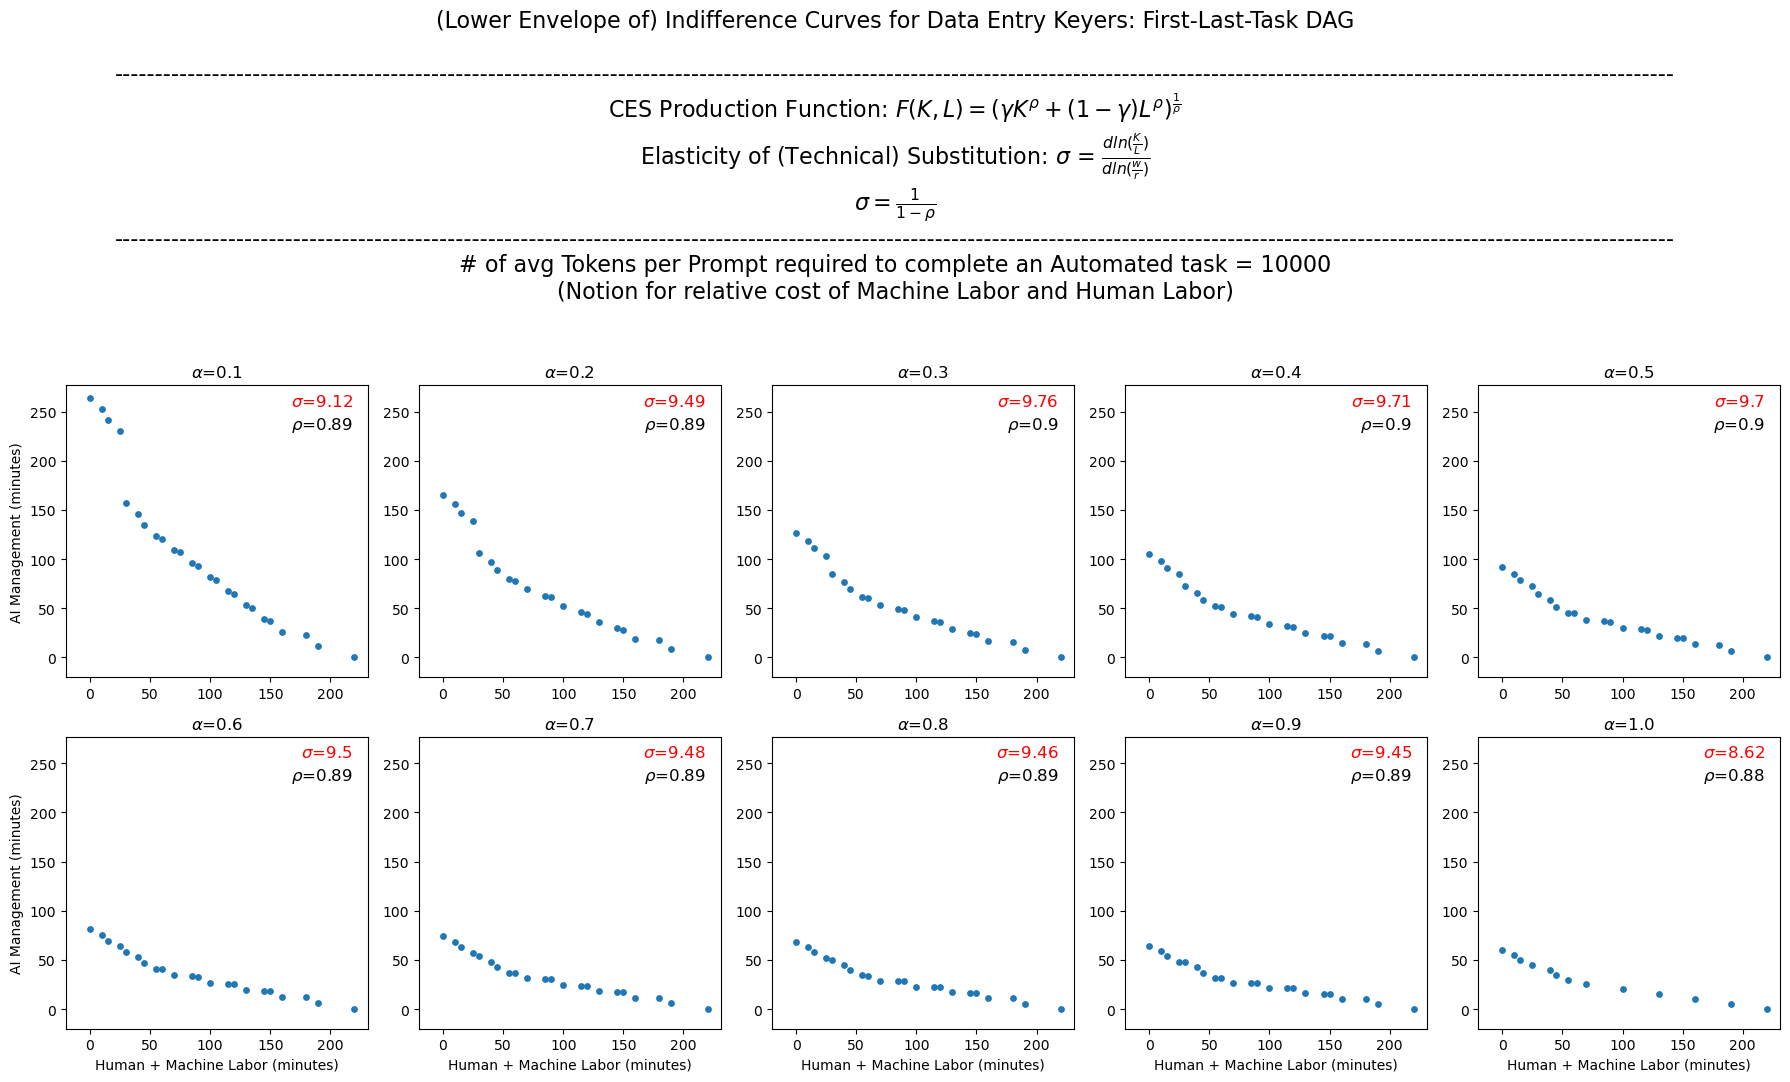

In [748]:
# Create a 2x5 grid of subplots
fig, axs = plt.subplots(2, 5, figsize=(18, 11))

# Iterate over each subplot position and add a plot
for i in range(2): 
    for j in range(5): 
        alpha_index = (i % 5) * 5 + j
        my_alpha = alpha_list[alpha_index] # ignore epsilon

        # Subset corresponding alpha's data from master dataset
        my_alpha_indiff_df = lower_envelope_df[lower_envelope_df['alpha']==my_alpha]
        axs[i, j].scatter(my_alpha_indiff_df.labor_cost, my_alpha_indiff_df.management_cost, s=15)

        # Get ETS and CES elasticity for current alpha
        my_alpha_ETS = ETS_df.loc[ETS_df['alpha'] == my_alpha, 'ETS'].values[0]
        my_alpha_CES_elasticity = ETS_df.loc[ETS_df['alpha'] == my_alpha, 'CES_elasticity'].values[0]

        my_alpha_ETS = np.round(my_alpha_ETS, 2)
        my_alpha_CES_elasticity = np.round(my_alpha_CES_elasticity, 2)
        
        axs[i, j].title.set_text(r'$\alpha$' + f'={np.round(my_alpha,1)}')
        if i == 1:
              axs[i, j].set_xlabel('Human + Machine Labor (minutes)')
        if j == 0:
              axs[i, j].set_ylabel('AI Management (minutes)')
        #axs[i, j].legend(loc = 'upper right')

        axs[i, j].set_xlim(-20, lower_envelope_df.labor_cost.max() * 1.05)
        axs[i, j].set_ylim(-20, lower_envelope_df.management_cost.max() * 1.05)

        # Add ETS to plot
        CES_elasticity_display = r'$\rho$' + f'={np.round(my_alpha_CES_elasticity, 2)}'
        ETS_display = r'$\sigma$' + f'={np.round(my_alpha_ETS, 2)}'
        axs[i, j].text(0.95, 0.975, ETS_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color='red')
        axs[i, j].text(0.95, 0.9, CES_elasticity_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')
        

fig.suptitle(f'(Lower Envelope of) Indifference Curves for {plot_title_occupation}: First-Last-Task DAG\n' +
             '\n' + 
            '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n' + 
             r'CES Production Function: $F(K,L) = (\gamma K^{\rho} + (1-\gamma) L^{\rho})^{\frac{1}{\rho}} $' + '\n' +
             r'Elasticity of (Technical) Substitution: $\sigma$ = $\frac{dln(\frac{K}{L})}{dln(\frac{w}{r})}$' + '\n' +
             r'$\sigma = \frac{1}{1-\rho}$'
             '\n' +
             '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n' +
             f'# of avg Tokens per Prompt required to complete an Automated task = {avg_num_prompts}\n' +
             f'(Notion for relative cost of Machine Labor and Human Labor)\n' + 
             '\n',
             fontsize=16)

plt.tight_layout()

# Save the plot
plt.savefig(f'{occupation_folder}/indiffCurves/{occupation}_indiffCurves_FLT_totalCost_{avg_num_prompts}.png', dpi=300)
#plt.savefig(f'{data_path}/daily_tasks_occupations_analysis/plots/indiffCurves/{occupation}_indiffCurves_FLT.png', dpi=300)

# Show plot
plt.show()

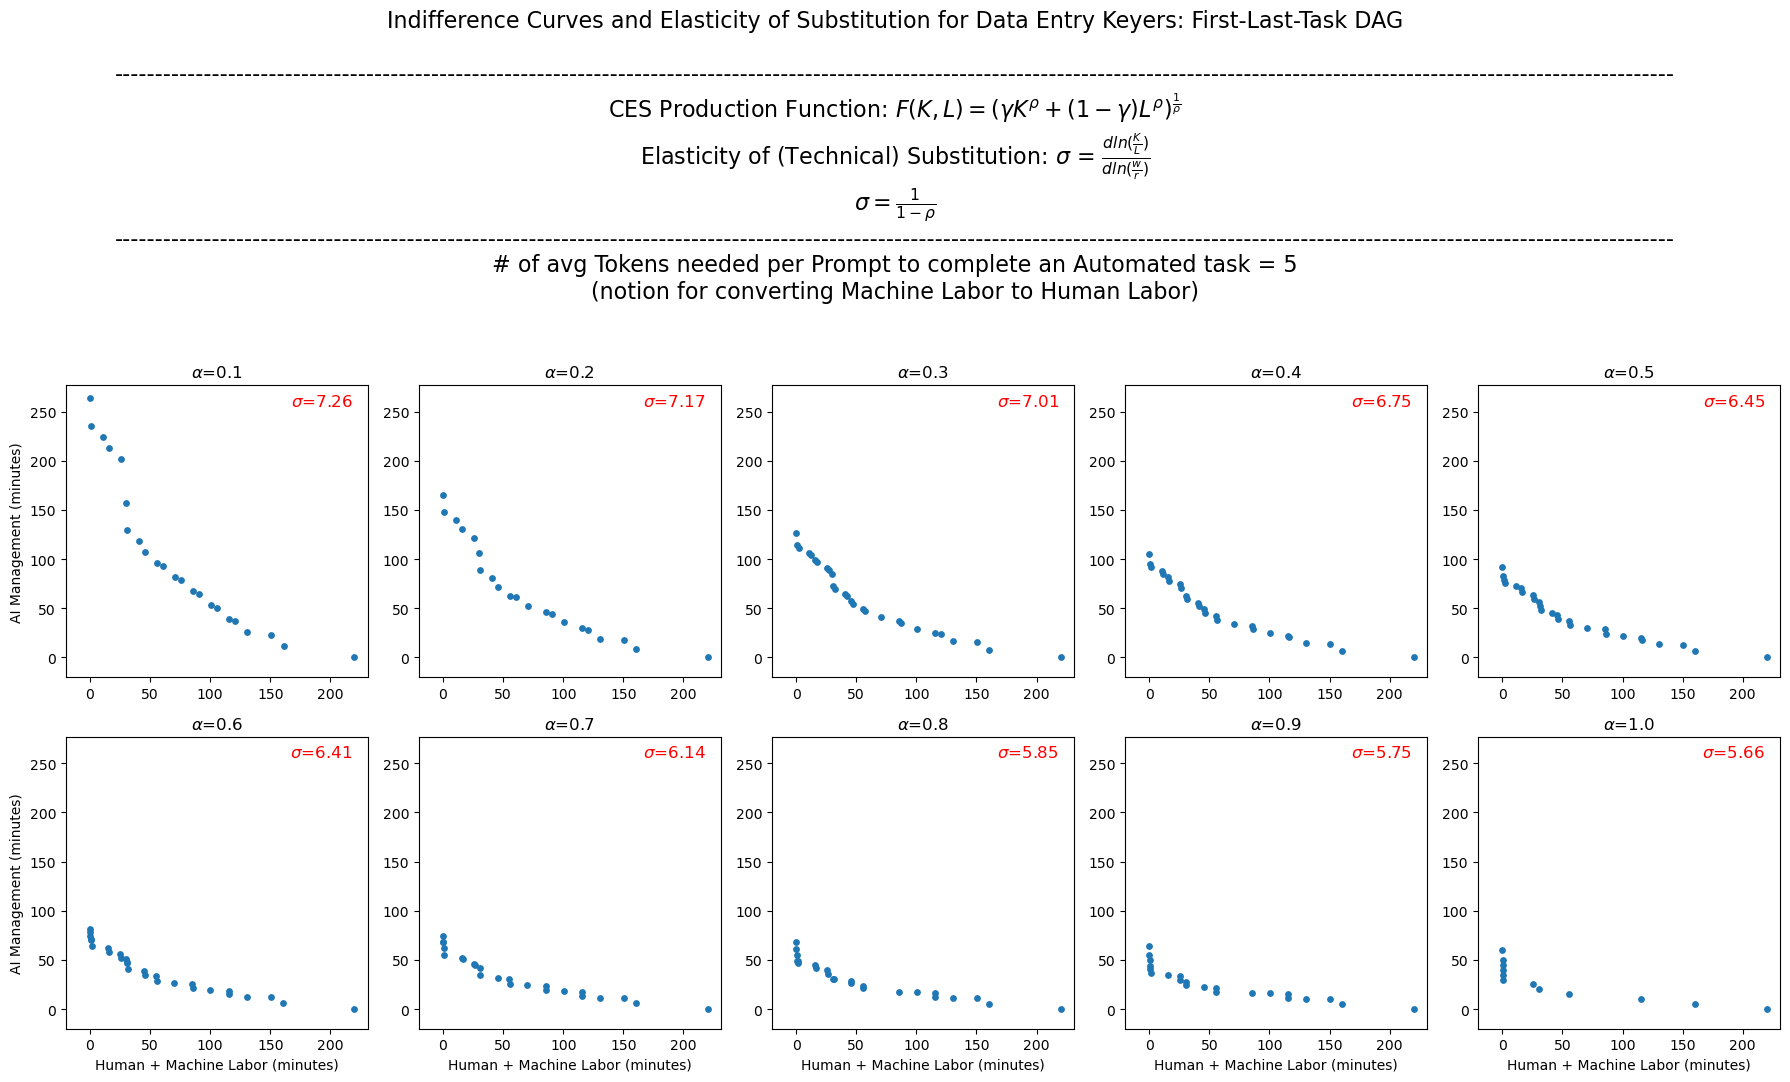

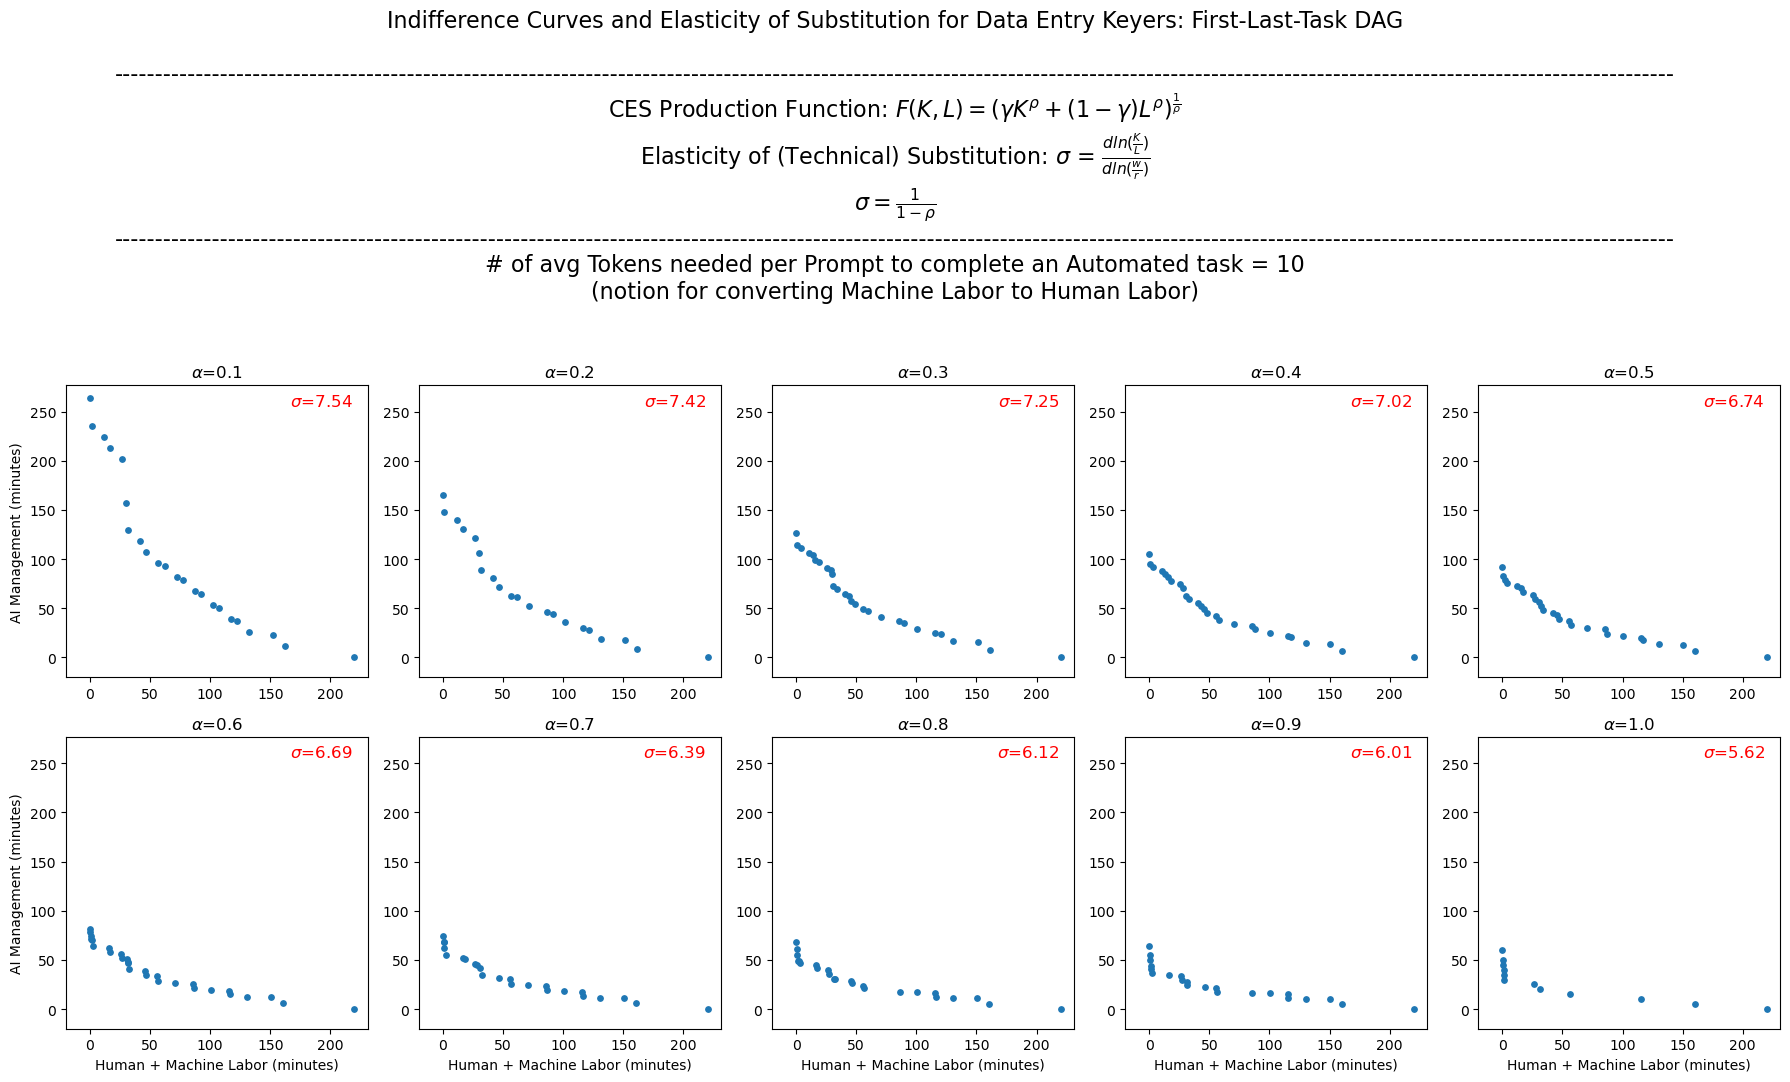

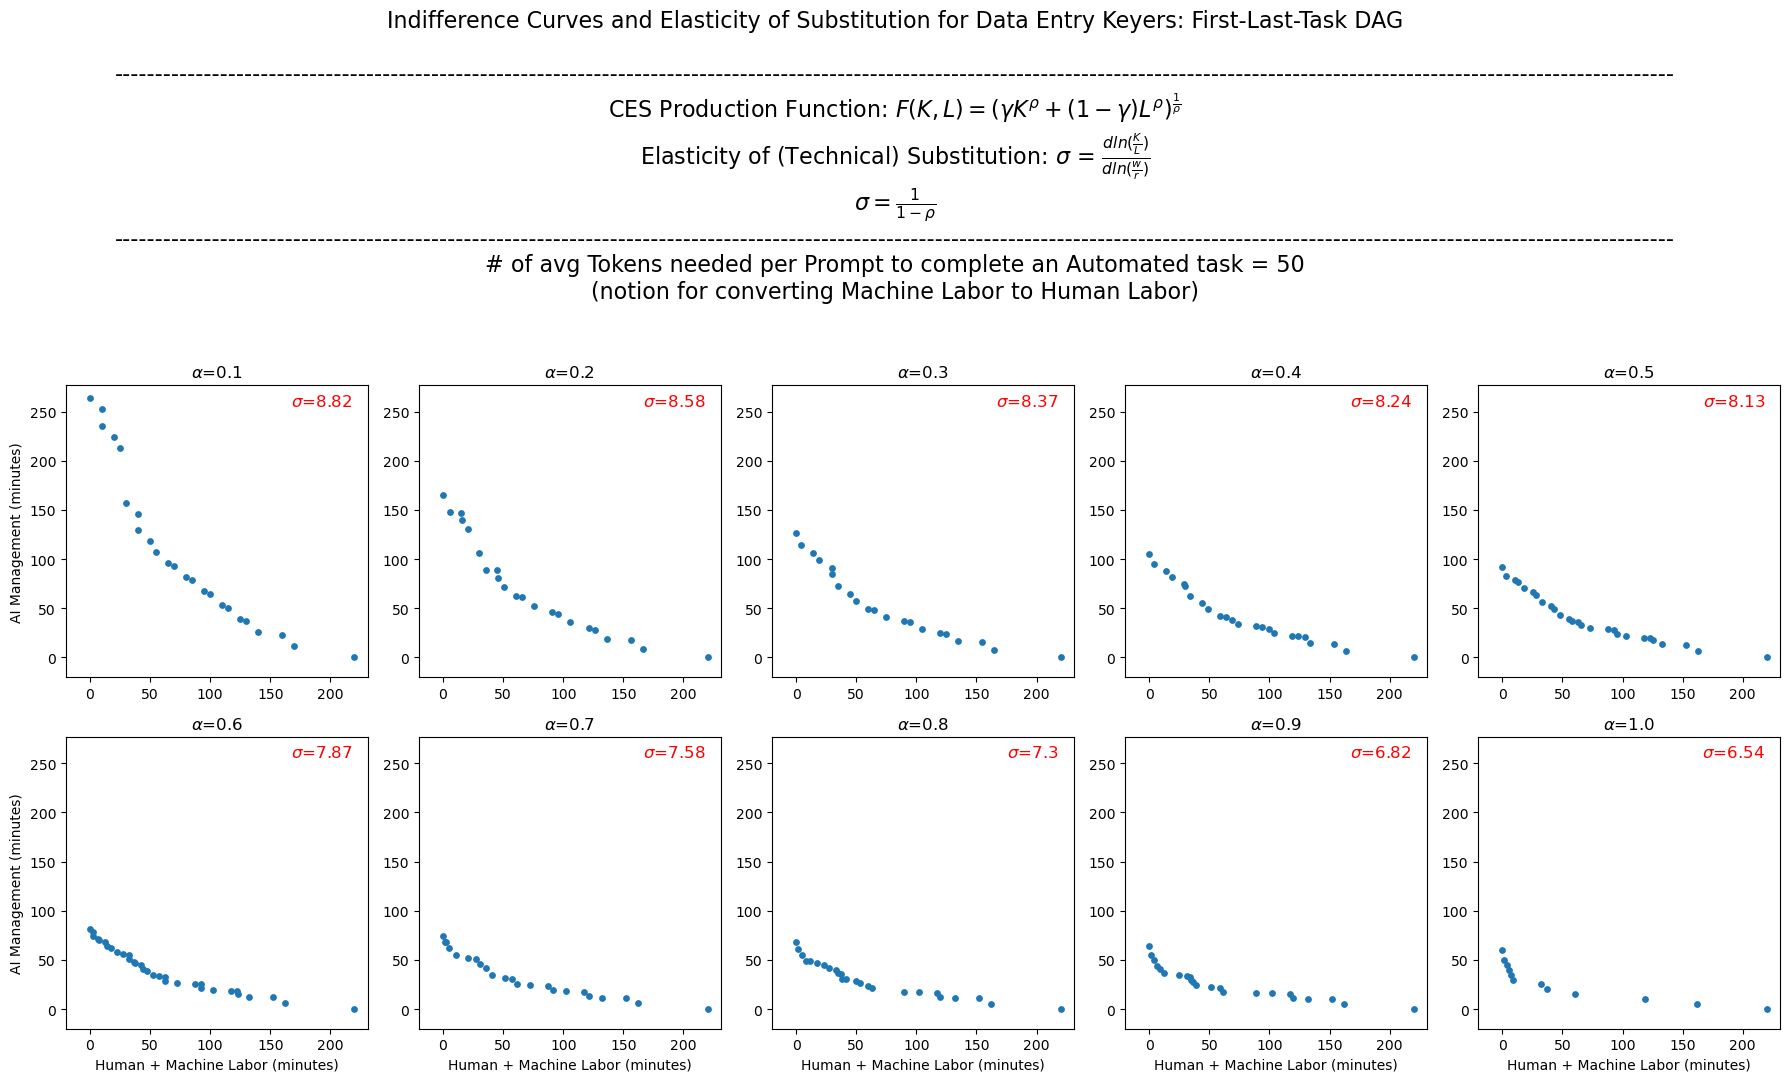

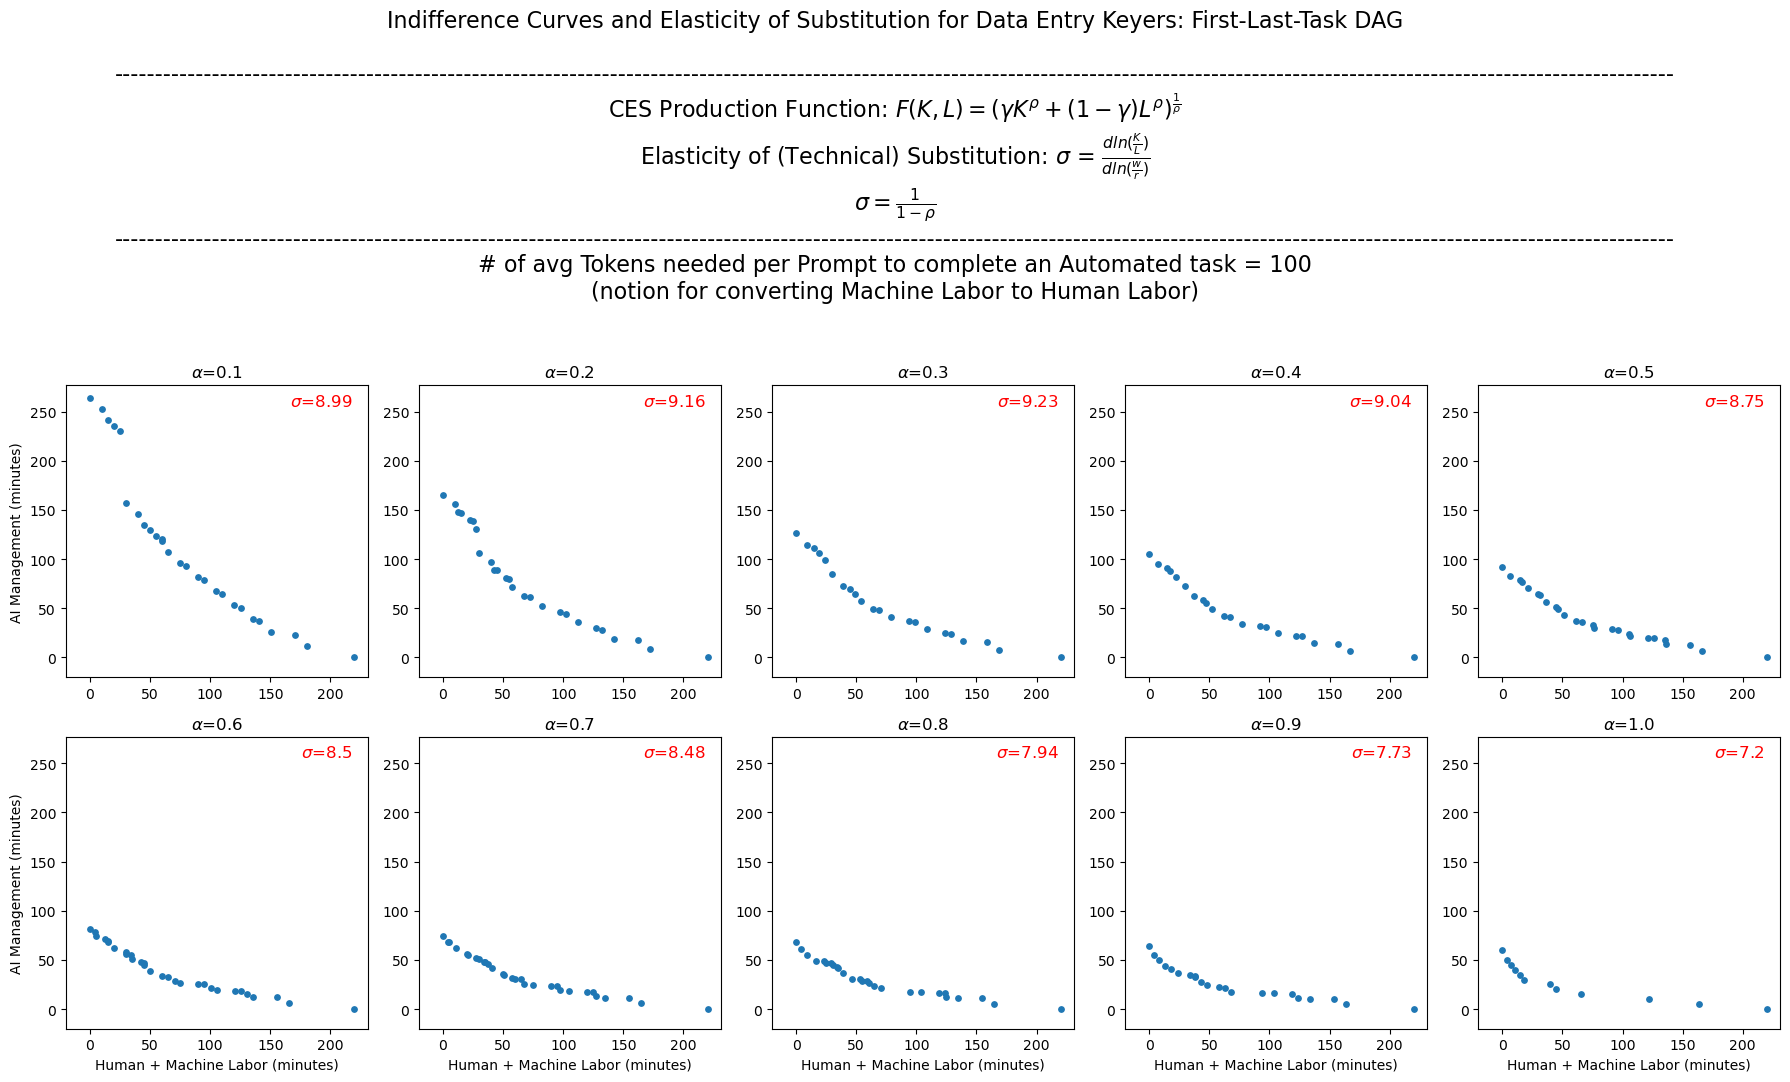

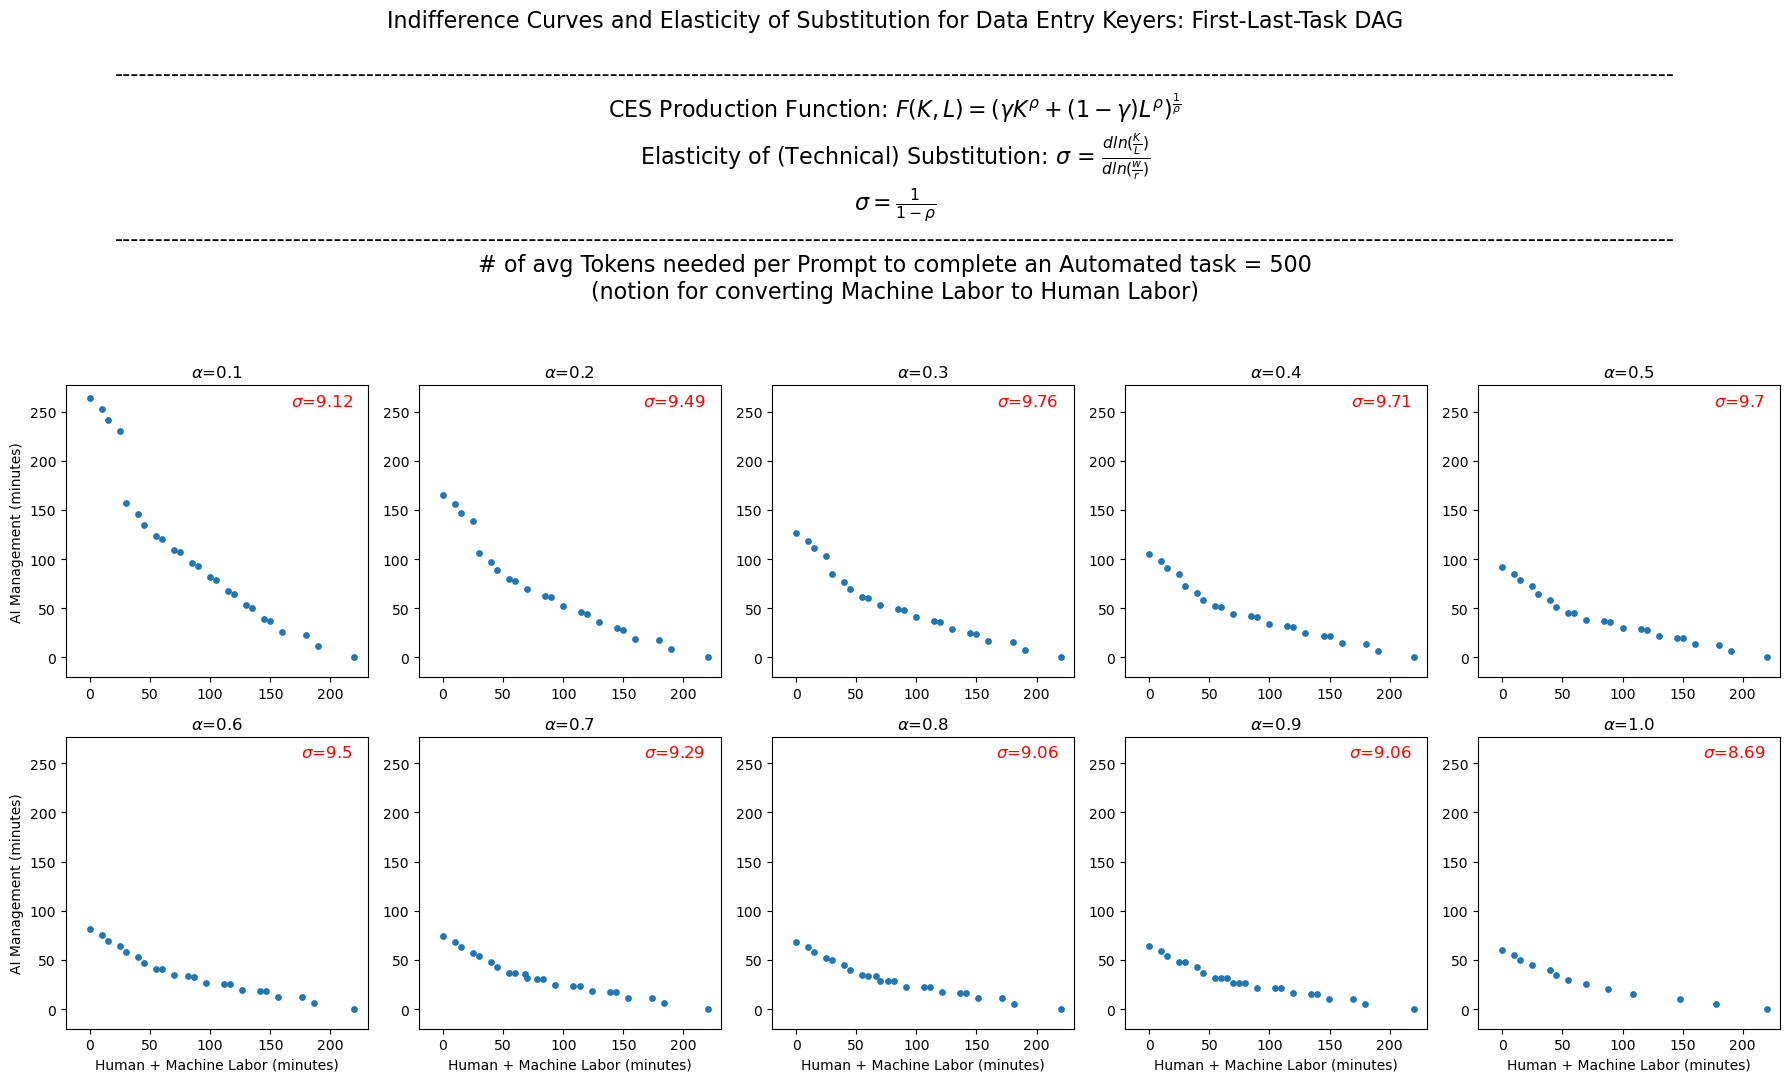

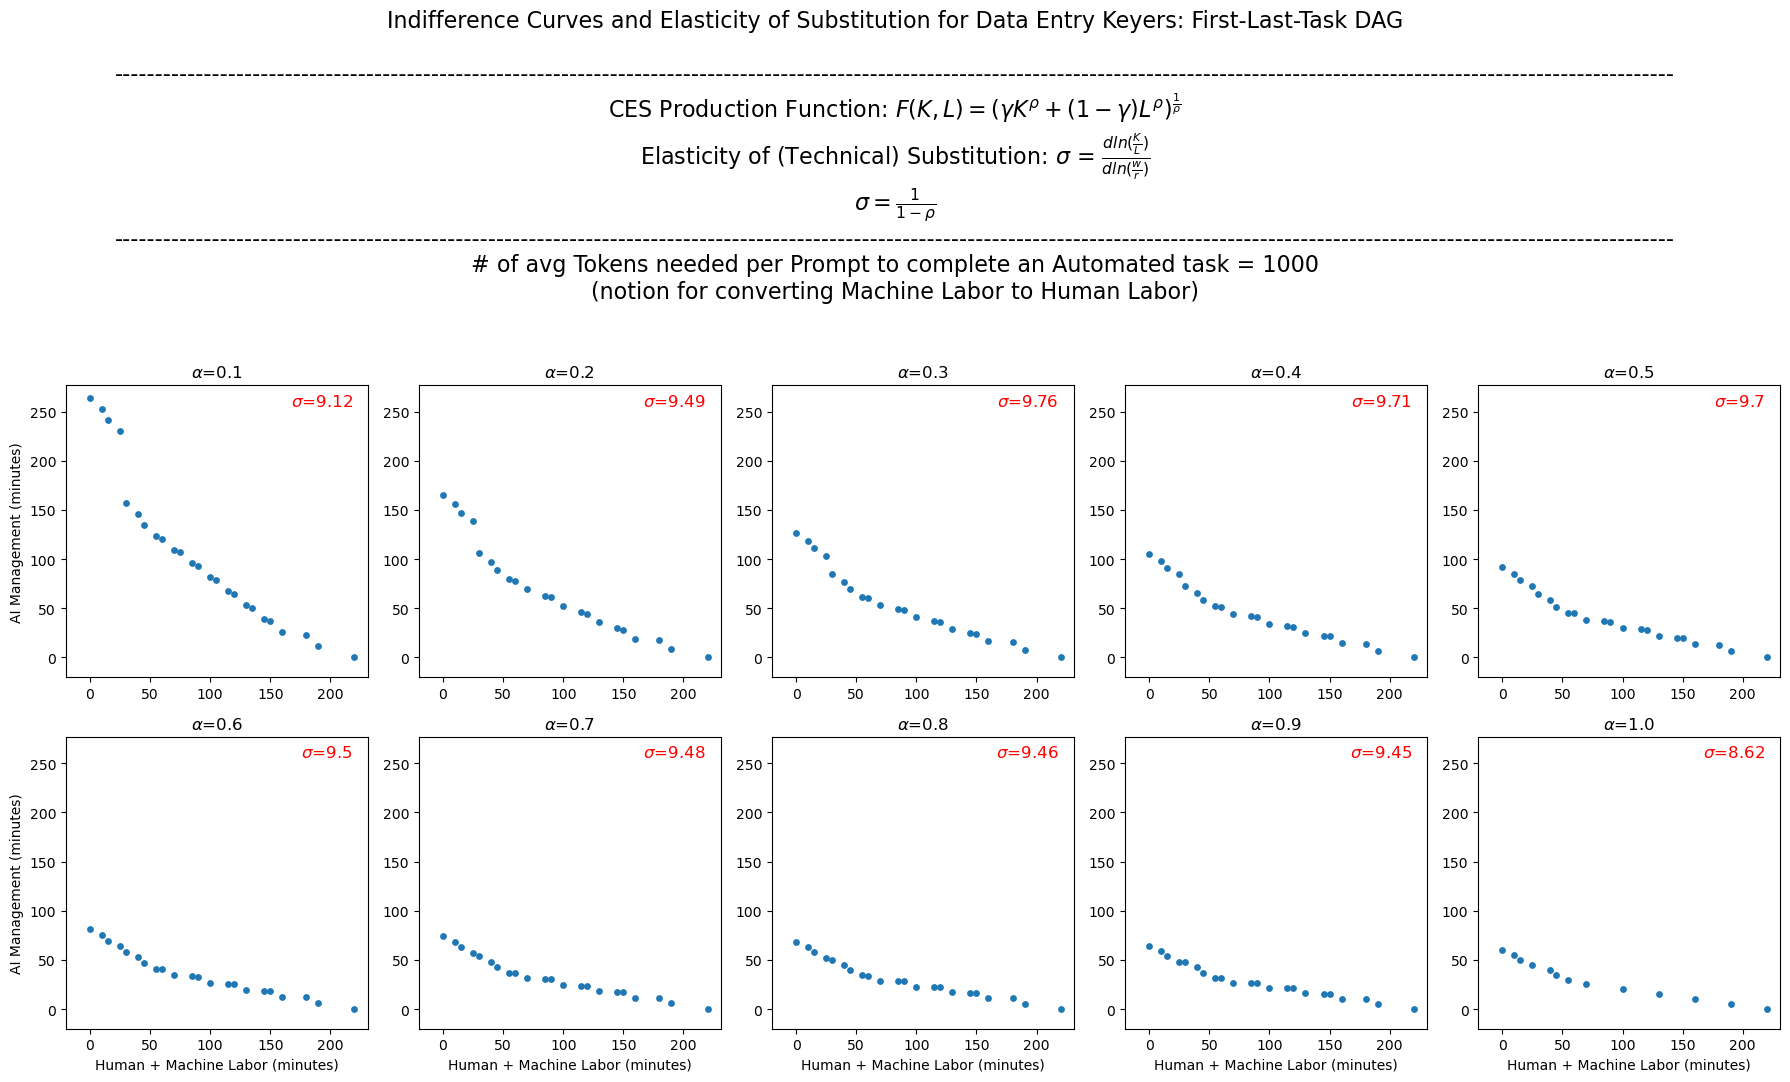

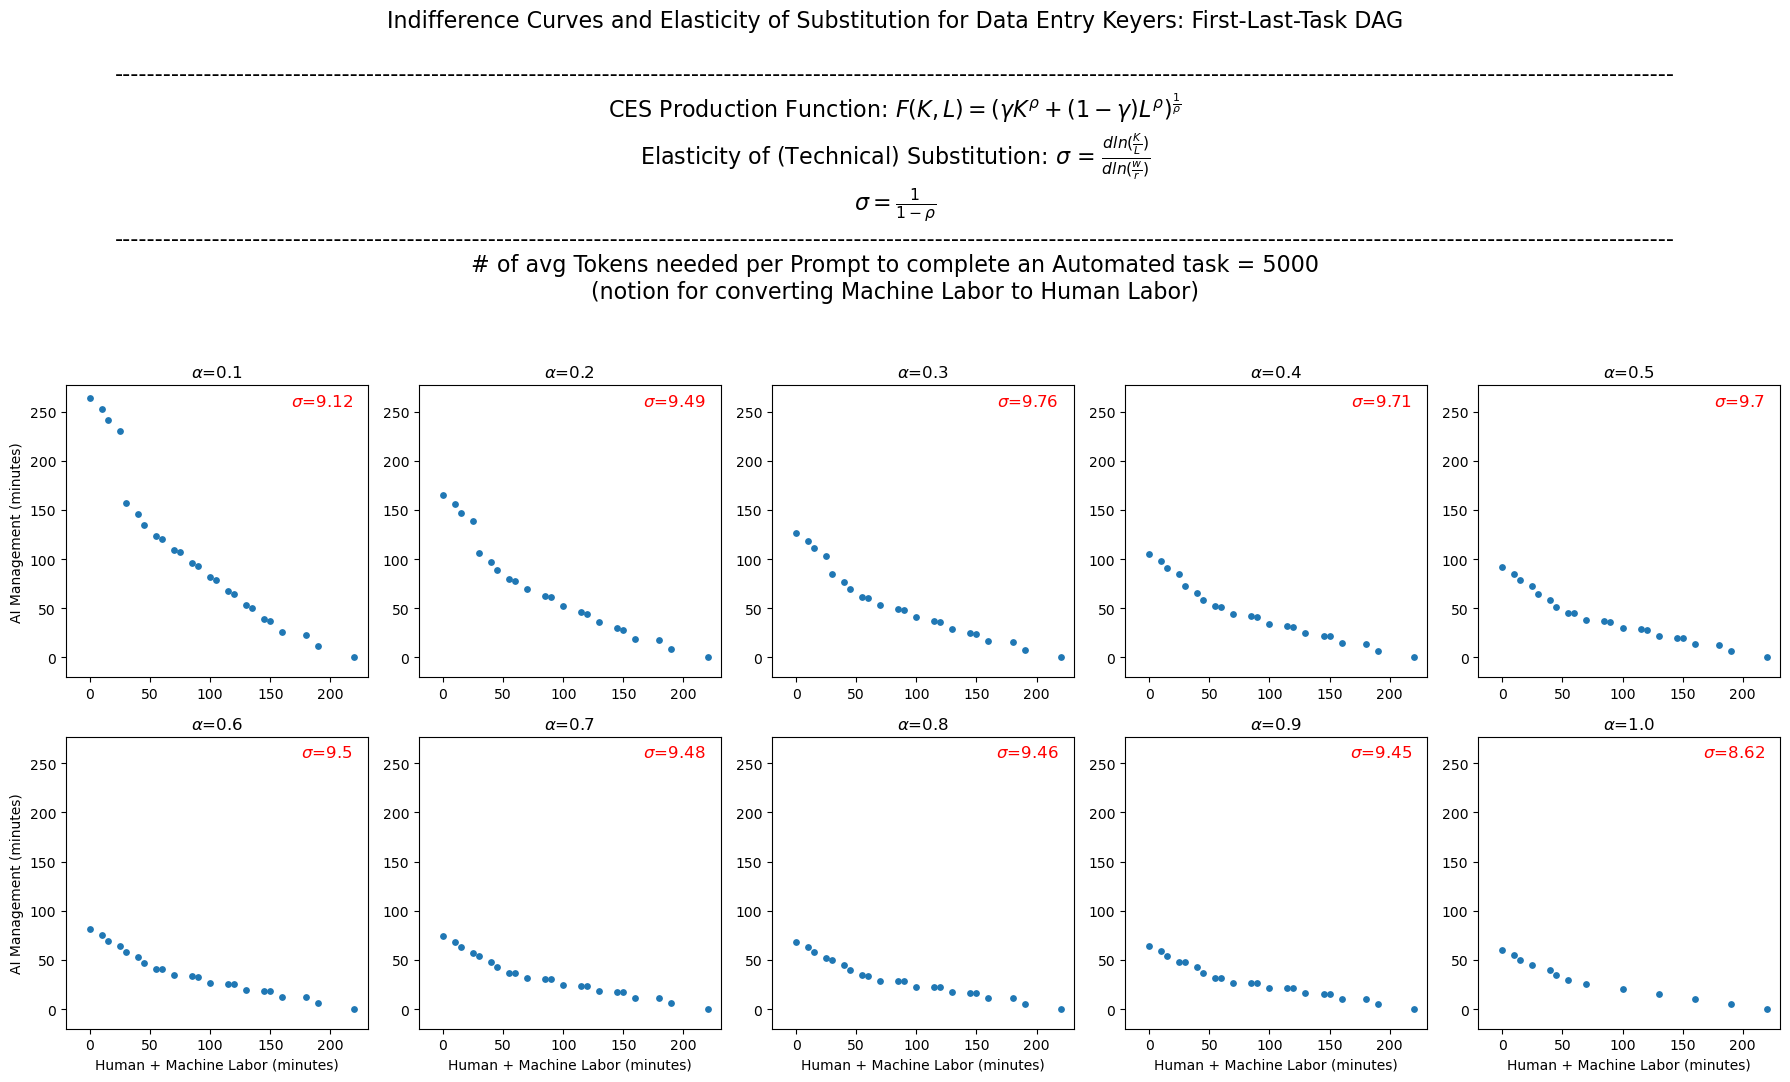

In [749]:
indiff_df = indiff_df_orig.copy()

# min wage = $15 / hour
labor_wage = 15 / 60 # $ per minute

# management cost: rental cost of capital
AI_rental_cost = 1

# avg number of tokens per prompt
avg_num_prompts_list = [5, 10, 50, 100, 500, 1000, 5000]
for avg_num_prompts in avg_num_prompts_list:

    # GPT-4 cost per 1 million tokens: $30
    API_cost = avg_num_prompts * 30 / 1e6 # $ per prompt

    # convert machine labor cost to minutes and add to human labor cost in minutes
    indiff_df['labor_cost'] = indiff_df.apply(lambda row: row['human_labor_cost'] + (row['machine_labor_cost'] * API_cost / labor_wage), axis=1)

    # calculate total cost
    indiff_df['total_cost'] = indiff_df.apply(lambda row: row['labor_cost'] * labor_wage + row['management_cost'] * AI_rental_cost, axis=1)

    # find optimal execution plan
    indiff_df['min_total_cost_flag'] = indiff_df.groupby('alpha')['total_cost'].transform(lambda x: x == x.min())
    indiff_df[indiff_df.alpha > 0].min_total_cost_flag.value_counts()




    # Get lower envelope of points
    lower_envelope_df = pd.DataFrame()
    for i in range(2): 
        for j in range(5):
            alpha_index = (i % 5) * 5 + j
            my_alpha = alpha_list[alpha_index]

            # subset corresponding alpha's data from master dataset
            my_alpha_indiff_df = indiff_df[indiff_df['alpha']==my_alpha]

            # drop duplicates, if any exist
            my_alpha_indiff_df = my_alpha_indiff_df.drop_duplicates(subset=['labor_cost', 'management_cost'])

            # get lower envelope for current alpha
            my_alpha_indiff_lower_envelope_df = remove_dominated_points(my_alpha_indiff_df)

            # append to lower envelope dataframe
            lower_envelope_df = pd.concat([lower_envelope_df, my_alpha_indiff_lower_envelope_df], ignore_index=True)
    lower_envelope_df
    lower_envelope_df[lower_envelope_df.alpha > 0].min_total_cost_flag.value_counts()



    # Get multiple labor-management wage pairs and find optimal plan for each
    n = 25 # 0.5 * number of different pairs

    # for a fixed labor_wage generate n different AI_rental_cost values
    list_1 = list(np.round(np.linspace(1/n, 1, n), 5))
    list_2 = list(np.linspace(1, n, n))
    AI_rental_cost_list = list_1[:-1] + list_2
    AI_rental_cost_list = [value * labor_wage for value in AI_rental_cost_list]

    # AI_rental_cost_list = np.linspace(epsilon, 1000, n)

    # Fix labor_wage and vary AI_rental_cost 
    optimal_plans_df = pd.DataFrame()
    for AI_rental_cost in AI_rental_cost_list:
        ###### hacky way of getting around zero input values ######
        lower_envelope_df['labor_cost'] = lower_envelope_df['labor_cost'].apply(lambda x: x + epsilon if x == 0 else x)
        lower_envelope_df['management_cost'] = lower_envelope_df['management_cost'].apply(lambda x: x + epsilon if x == 0 else x)

        # Calculate total cost
        lower_envelope_df['total_cost'] = lower_envelope_df.apply(lambda row: row['labor_cost'] * labor_wage + row['management_cost'] * AI_rental_cost, axis=1)

        # Find optimal execution plan given labor_wage and AI_rental_cost
        lower_envelope_df['min_total_cost_flag'] = lower_envelope_df.groupby('alpha')['total_cost'].transform(lambda x: x == x.min())

        # Save optimal plan to master dataframe
        aux_df = lower_envelope_df[lower_envelope_df.min_total_cost_flag]
        aux_df['AI_rental_cost'] = AI_rental_cost
        optimal_plans_df = pd.concat([optimal_plans_df, aux_df], ignore_index=True)

    # Sort by alpha and AI_rental_cost
    optimal_plans_df = optimal_plans_df.sort_values(by=['alpha', 'AI_rental_cost']).reset_index(drop=True)
    optimal_plans_df.tail(2*n)


    # Run regression to find elasticity of technical substitution
    ETS_df = pd.DataFrame()
    for my_alpha in alpha_list:
        # Subset data for current alpha
        my_alpha_regression_df = optimal_plans_df[optimal_plans_df.alpha == my_alpha]

        # Calculate elasticity of technical substitution
        ETS = calc_ETS_by_regression(my_alpha_regression_df, labor_wage)

        # Append to dataframe
        aux_df = pd.DataFrame({'alpha': [my_alpha], 'ETS': [ETS]})
        ETS_df = pd.concat([ETS_df, aux_df], ignore_index=True)

    ETS_df['CES_elasticity'] = (ETS_df['ETS'] - 1) / ETS_df['ETS']




    # Create a 2x5 grid of subplots
    fig, axs = plt.subplots(2, 5, figsize=(18, 11))

    # Iterate over each subplot position and add a plot
    for i in range(2): 
        for j in range(5): 
            alpha_index = (i % 5) * 5 + j
            my_alpha = alpha_list[alpha_index] # ignore epsilon

            # Subset corresponding alpha's data from master dataset
            my_alpha_indiff_df = lower_envelope_df[lower_envelope_df['alpha']==my_alpha]
            axs[i, j].scatter(my_alpha_indiff_df.labor_cost, my_alpha_indiff_df.management_cost, s=15)

            # Get ETS and CES elasticity for current alpha
            my_alpha_ETS = ETS_df.loc[ETS_df['alpha'] == my_alpha, 'ETS'].values[0]
            my_alpha_CES_elasticity = ETS_df.loc[ETS_df['alpha'] == my_alpha, 'CES_elasticity'].values[0]

            my_alpha_ETS = np.round(my_alpha_ETS, 2)
            my_alpha_CES_elasticity = np.round(my_alpha_CES_elasticity, 2)
            
            
            axs[i, j].title.set_text(r'$\alpha$' + f'={np.round(my_alpha,1)}')
            if i == 1:
                axs[i, j].set_xlabel('Human + Machine Labor (minutes)')
            if j == 0:
                axs[i, j].set_ylabel('AI Management (minutes)')
            #axs[i, j].legend(loc = 'upper right')

            axs[i, j].set_xlim(-20, lower_envelope_df.labor_cost.max() * 1.05)
            axs[i, j].set_ylim(-20, lower_envelope_df.management_cost.max() * 1.05)

            # Add ETS to plot
            CES_elasticity_display = r'$\rho$' + f'={np.round(my_alpha_CES_elasticity, 2)}'
            ETS_display = r'$\sigma$' + f'={np.round(my_alpha_ETS, 2)}'
            axs[i, j].text(0.95, 0.975, ETS_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right', color='red')
            #axs[i, j].text(0.95, 0.9, CES_elasticity_display, transform=axs[i, j].transAxes, fontsize=12, verticalalignment='top', horizontalalignment='right')
            

    fig.suptitle(f'Indifference Curves and Elasticity of Substitution for {plot_title_occupation}: First-Last-Task DAG\n' +
                '\n' + 
                '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n' + 
                r'CES Production Function: $F(K,L) = (\gamma K^{\rho} + (1-\gamma) L^{\rho})^{\frac{1}{\rho}} $' + '\n' +
                r'Elasticity of (Technical) Substitution: $\sigma$ = $\frac{dln(\frac{K}{L})}{dln(\frac{w}{r})}$' + '\n' +
                r'$\sigma = \frac{1}{1-\rho}$'
                '\n' +
                '------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n' +
                f'# of avg Tokens needed per Prompt to complete an Automated task = {avg_num_prompts}\n' +
                f'(notion for converting Machine Labor to Human Labor)\n' + 
                '\n',
                fontsize=16)

    plt.tight_layout()

    # Save the plot
    plt.savefig(f'{occupation_folder}/indiffCurves/{occupation}_indiffCurves_FLT_totalCost_{avg_num_prompts}.png', dpi=300)
    #plt.savefig(f'{data_path}/daily_tasks_occupations_analysis/plots/indiffCurves/{occupation}_indiffCurves_FLT.png', dpi=300)

    # Show plot
    plt.show()